[코드]
후기 데이터셋 이용하여 KOBERT 모델 학습하고, 저장 

In [1]:
import pandas as pd 

In [2]:
data_path = '/home/ubuntu/chatbot/dataset/'

In [3]:
keyword_df = pd.read_csv(data_path + 'Wellness_Conversation_intent_keyword.csv')
keyword_df

,intent,keyword(임상키워드),utterance(2차),intent_label,intent_keyword,ik_label
0,우울감,우울,임신해서 우울해,0,우울감/우울,0
1,우울감,우울,아이 가지고 나서 우울해,0,우울감/우울,0
2,우울감,우울,아이 가졌는데 기분 하나도 안 좋고 울적해,0,우울감/우울,0
3,우울감,우울,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,0,우울감/우울,0
4,우울감,우울,진단 결과 안 좋게 나올 것 같아서 우울해,0,우울감/우울,0
...,...,...,...,...,...,...
19671,불안,압박감,그래도 잠못자고 불안한건 여전해요.,18,불안/압박감,204
19672,불안,압박감,불안함에 항상 시달리니까 잠도 못잤어요.,18,불안/압박감,204
19673,불안,압박감,불안하고 초조해서 잠이 안 와.,18,불안/압박감,204
19674,불안,압박감,너무 불안하니까 밤만 되면 잠이 안 오고 너무 초조해.,18,불안/압박감,204


#### KoBERT 모델로 main_cate 분류하기 

In [4]:
main_df = keyword_df[['intent_keyword', 'utterance(2차) ', 'ik_label']]

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19676 entries, 0 to 19675
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   intent_keyword  19676 non-null  object
 1   utterance(2차)   19676 non-null  object
 2   ik_label        19676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 461.3+ KB


In [6]:
main_df.isnull().sum()

intent_keyword    0
utterance(2차)     0
ik_label          0
dtype: int64

In [7]:
main_df = main_df.dropna()

In [8]:
main_df.reset_index(inplace=True, drop=True)

In [9]:
main_df['utterance(2차) '] = main_df['utterance(2차) '].apply(lambda x: x.replace('\t', ''))
main_df

,intent_keyword,utterance(2차),ik_label
0,우울감/우울,임신해서 우울해,0
1,우울감/우울,아이 가지고 나서 우울해,0
2,우울감/우울,아이 가졌는데 기분 하나도 안 좋고 울적해,0
3,우울감/우울,임신했는데 남편이 하나도 안 챙겨줘서 우울하다,0
4,우울감/우울,진단 결과 안 좋게 나올 것 같아서 우울해,0
...,...,...,...
19671,불안/압박감,그래도 잠못자고 불안한건 여전해요.,204
19672,불안/압박감,불안함에 항상 시달리니까 잠도 못잤어요.,204
19673,불안/압박감,불안하고 초조해서 잠이 안 와.,204
19674,불안/압박감,너무 불안하니까 밤만 되면 잠이 안 오고 너무 초조해.,204


In [10]:
ik_list = list(main_df['intent_keyword'].unique())
len(ik_list)

205

##### 학습셋 테스트셋 분리 

In [11]:
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(main_df, test_size=0.2, random_state=42, stratify=main_df['intent_keyword'])

In [12]:
X_train

,intent_keyword,utterance(2차),ik_label
3607,외로움/무의미함,외롭고 쓸쓸하고 의미 없는 시간 속에서 지쳐가,33
17743,절망감/포기,임신을 포기하고 친구들도 잘 안 만나게 됐어,190
11359,초조함/감정기복,임신하고 나서 몸이 너무 변하니까 감정기복이 심해졌어,120
18594,자살충동/하찮음,나 같은 백수는 그냥 콱 죽는 게 낫지.,198
3907,외로움/고독감,고독해서 힘들어요,38
...,...,...,...
1085,우울감/집중력감소,평소에 우울할때가 많아요.,12
2293,슬픔/허망함,세상에 내 편이 없는 것 같아서 허망해요,23
12133,초조함/욱함,아..근데 또 막상 공부를 안 하자니 성적이 떨어질까 걱정되네요.,122
4313,분노/원망,남편이랑 말도 하기 싫은 거야,41


In [13]:
len(X_train.intent_keyword.unique()), len(X_test.intent_keyword.unique())

(205, 205)

In [14]:
# tsv 데이터셋으로 변환
X_train.to_csv(data_path + 'keyword_train.tsv', sep='\t', encoding='utf-8', index=False)
X_test.to_csv(data_path + 'keyword_test.tsv', sep='\t', encoding='utf-8', index=False)

##### KoBERT 실행환경 구축

In [15]:
# !pip install ipywidgets  # for vscode
# !pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [16]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm.notebook import tqdm

from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

2022-09-16 01:48:28.270301: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [17]:
len(ik_list)

205

In [18]:
## CPU
# device = torch.device("cpu")

## GPU
device = torch.device("cuda:0")

In [19]:
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")   # BERT 모델 가져오기

using cached model. /home/ubuntu/chatbot/code/.cache/kobert_v1.zip
using cached model. /home/ubuntu/chatbot/code/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [20]:
dataset_train = nlp.data.TSVDataset(data_path + 'keyword_train.tsv', field_indices=[1, 2], num_discard_samples=1)
dataset_test = nlp.data.TSVDataset(data_path + 'keyword_test.tsv', field_indices=[1, 2], num_discard_samples=1)

In [21]:
list(dataset_test[1])

['아직 내가 하고 싶은 대로 살고 싶은데 너무 억울해', '26']

In [22]:
tokenizer = get_tokenizer()   # 토크나이저 선언 
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)   # token 설정

using cached model. /home/ubuntu/chatbot/code/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [23]:
dataset_train, len(dataset_train)

(<gluonnlp.data.dataset.TSVDataset at 0x7f51487e8c90>, 15740)

In [24]:
# BERT Dataset 클래스 생성 
class BERTDataset(Dataset):   
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [25]:
# 파라미터 설정 
max_len = 64     # 토큰 최대 길이 
batch_size = 64   # 배치 사이즈 
warmup_ratio = 0.1   # 웜-업 비율 
num_epochs = 50   # 학습 수  
max_grad_norm = 1   # gradient 정규화 최대값 
log_interval = 200   # interval 간격
learning_rate =  5e-5   # 학습률 

In [26]:
len(dataset_train), dataset_train

(15740, <gluonnlp.data.dataset.TSVDataset at 0x7f51487e8c90>)

In [27]:
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)   # 학습 데이터셋 생성 
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)   # 테스트 데이터셋 생성 

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [28]:
# BERT Classifier 클래스 생성 
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=len(ik_list),
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()    # 부모 클래스 생성자 초기화 
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)   # 선형 분류기 생성 
        if dr_rate:   # 드랍아웃 
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask \
                              = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [29]:
# 사전훈련된 BERT 모델 생성 
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)  

In [30]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)   # 웜업 스텝 설정 

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

/home/ubuntu/anaconda3/envs/chatbot/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [31]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [31]:
train_acc_list_50 = []
test_acc_list_50 = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    batch = [] 
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    train_acc_list_50.append(train_acc / (batch_id+1))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, test_acc / (batch_id+1)))
    test_acc_list_50.append(test_acc / (batch_id+1))

  0%|          | 0/246 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 5.34111213684082 train acc 0.0
epoch 1 batch id 201 loss 5.10125207901001 train acc 0.033271144278606966
epoch 1 train acc 0.040667344173441734


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 1 val acc 0.0846774193548387


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 4.9134345054626465 train acc 0.09375
epoch 2 batch id 201 loss 4.413898468017578 train acc 0.09064054726368159
epoch 2 train acc 0.09639227642276423


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 2 val acc 0.1580141129032258


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 4.154152870178223 train acc 0.1875
epoch 3 batch id 201 loss 3.711594581604004 train acc 0.24432524875621892
epoch 3 train acc 0.252612635501355


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 3 val acc 0.3329133064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 3.335918426513672 train acc 0.375
epoch 4 batch id 201 loss 2.935448169708252 train acc 0.36551616915422885
epoch 4 train acc 0.36937669376693766


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 4 val acc 0.4480846774193548


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 2.8263161182403564 train acc 0.453125
epoch 5 batch id 201 loss 2.5780391693115234 train acc 0.46323072139303484
epoch 5 train acc 0.46764905149051494


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 5 val acc 0.5473790322580645


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 2.372408390045166 train acc 0.578125
epoch 6 batch id 201 loss 2.1454434394836426 train acc 0.5597792288557214
epoch 6 train acc 0.5654598577235772


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 6 val acc 0.6013104838709677


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 1.8822191953659058 train acc 0.65625
epoch 7 batch id 201 loss 1.4751505851745605 train acc 0.6540733830845771
epoch 7 train acc 0.6565633468834687


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 7 val acc 0.6610383064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 1.509796142578125 train acc 0.734375
epoch 8 batch id 201 loss 1.337910771369934 train acc 0.7240360696517413
epoch 8 train acc 0.7264439363143631


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 8 val acc 0.6829637096774194


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 1.1163203716278076 train acc 0.75
epoch 9 batch id 201 loss 1.064841866493225 train acc 0.78125
epoch 9 train acc 0.7827235772357723


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 9 val acc 0.7084173387096774


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.8317819237709045 train acc 0.875
epoch 10 batch id 201 loss 0.7776275277137756 train acc 0.8252487562189055
epoch 10 train acc 0.8261602303523036


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 10 val acc 0.7290826612903226


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.5965453386306763 train acc 0.875
epoch 11 batch id 201 loss 0.6704748868942261 train acc 0.8606187810945274
epoch 11 train acc 0.8615599593495935


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 11 val acc 0.7313508064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.4516134262084961 train acc 0.90625
epoch 12 batch id 201 loss 0.6303747892379761 train acc 0.8940453980099502
epoch 12 train acc 0.8933138550135502


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 12 val acc 0.7376512096774194


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.32300257682800293 train acc 0.953125
epoch 13 batch id 201 loss 0.3601747751235962 train acc 0.9105254975124378
epoch 13 train acc 0.912059620596206


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 13 val acc 0.7517641129032258


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.2669094204902649 train acc 0.953125
epoch 14 batch id 201 loss 0.365335077047348 train acc 0.9236629353233831
epoch 14 train acc 0.9263634823848238


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 14 val acc 0.7600806451612904


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.1787523627281189 train acc 0.984375
epoch 15 batch id 201 loss 0.28245237469673157 train acc 0.9392101990049752
epoch 15 train acc 0.9405191395663957


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 15 val acc 0.7527721774193549


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.21890072524547577 train acc 0.9375
epoch 16 batch id 201 loss 0.24516324698925018 train acc 0.9484608208955224
epoch 16 train acc 0.9488482384823848


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 16 val acc 0.7583165322580645


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.1313067376613617 train acc 0.984375
epoch 17 batch id 201 loss 0.14819106459617615 train acc 0.9598103233830846
epoch 17 train acc 0.9601710704607046


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 17 val acc 0.764616935483871


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.1087663397192955 train acc 0.984375
epoch 18 batch id 201 loss 0.17271757125854492 train acc 0.9659514925373134
epoch 18 train acc 0.9662008807588076


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 18 val acc 0.7641129032258065


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.08183453232049942 train acc 0.984375
epoch 19 batch id 201 loss 0.10821091383695602 train acc 0.9712375621890548
epoch 19 train acc 0.9722391598915988


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 19 val acc 0.7739415322580645


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.07307644933462143 train acc 0.984375
epoch 20 batch id 201 loss 0.0989377498626709 train acc 0.9752798507462687
epoch 20 train acc 0.9753514566395663


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 20 val acc 0.7709173387096774


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.03667587786912918 train acc 1.0
epoch 21 batch id 201 loss 0.06282099336385727 train acc 0.9782338308457711
epoch 21 train acc 0.9786458333333333


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 21 val acc 0.7711693548387096


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.04199948534369469 train acc 1.0
epoch 22 batch id 201 loss 0.17456145584583282 train acc 0.982431592039801
epoch 22 train acc 0.9829734078590785


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 22 val acc 0.7709173387096774


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.04087559133768082 train acc 1.0
epoch 23 batch id 201 loss 0.05714114010334015 train acc 0.9849968905472637
epoch 23 train acc 0.9858951558265582


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 23 val acc 0.7782258064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 24 batch id 1 loss 0.02947463095188141 train acc 1.0
epoch 24 batch id 201 loss 0.03973786532878876 train acc 0.9894278606965174
epoch 24 train acc 0.9894478319783198


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 24 val acc 0.7840221774193549


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 25 batch id 1 loss 0.06621819734573364 train acc 0.984375
epoch 25 batch id 201 loss 0.04227423295378685 train acc 0.9898165422885572
epoch 25 train acc 0.9902777777777777


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 25 val acc 0.7779737903225806


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 26 batch id 1 loss 0.019710393622517586 train acc 1.0
epoch 26 batch id 201 loss 0.03080889768898487 train acc 0.9934701492537313
epoch 26 train acc 0.9935213414634146


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 26 val acc 0.7764616935483871


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 27 batch id 1 loss 0.01465157512575388 train acc 1.0
epoch 27 batch id 201 loss 0.041867006570100784 train acc 0.9953358208955224
epoch 27 train acc 0.9951092479674797


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 27 val acc 0.7754536290322581


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 28 batch id 1 loss 0.012304246425628662 train acc 1.0
epoch 28 batch id 201 loss 0.03741200268268585 train acc 0.9955690298507462
epoch 28 train acc 0.9952997967479674


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 28 val acc 0.7830141129032258


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 29 batch id 1 loss 0.012119951657950878 train acc 1.0
epoch 29 batch id 201 loss 0.011160406284034252 train acc 0.9972792288557214
epoch 29 train acc 0.9973323170731707


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 29 val acc 0.7779737903225806


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 30 batch id 1 loss 0.0075401742942631245 train acc 1.0
epoch 30 batch id 201 loss 0.007737632375210524 train acc 0.9973569651741293
epoch 30 train acc 0.9973323170731707


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 30 val acc 0.7772177419354839


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 31 batch id 1 loss 0.0083512794226408 train acc 1.0
epoch 31 batch id 201 loss 0.005867775063961744 train acc 0.9989894278606966
epoch 31 train acc 0.9987931910569106


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 31 val acc 0.7797379032258065


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 32 batch id 1 loss 0.005646302364766598 train acc 1.0
epoch 32 batch id 201 loss 0.008747413754463196 train acc 0.9989894278606966
epoch 32 train acc 0.9987254403794037


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 32 val acc 0.7784778225806451


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 33 batch id 1 loss 0.005828913301229477 train acc 1.0
epoch 33 batch id 201 loss 0.005522086285054684 train acc 0.9984452736318408
epoch 33 train acc 0.9983485772357723


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 33 val acc 0.7817540322580645


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 34 batch id 1 loss 0.003972983453422785 train acc 1.0
epoch 34 batch id 201 loss 0.0044632768258452415 train acc 0.9993003731343284
epoch 34 train acc 0.9989795054200541


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 34 val acc 0.7835181451612904


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 35 batch id 1 loss 0.0037479472812265158 train acc 1.0
epoch 35 batch id 201 loss 0.004606915637850761 train acc 0.9993003731343284
epoch 35 train acc 0.9991107723577236


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 35 val acc 0.7827620967741935


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 36 batch id 1 loss 0.0027343600522726774 train acc 1.0
epoch 36 batch id 201 loss 0.005326630547642708 train acc 0.9995335820895522
epoch 36 train acc 0.9994283536585366


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 36 val acc 0.7870463709677419


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 37 batch id 1 loss 0.0030500751454383135 train acc 1.0
epoch 37 batch id 201 loss 0.005260846111923456 train acc 0.9995335820895522
epoch 37 train acc 0.999364837398374


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 37 val acc 0.7870463709677419


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 38 batch id 1 loss 0.0022564297541975975 train acc 1.0
epoch 38 batch id 201 loss 0.003034718334674835 train acc 0.9997667910447762
epoch 38 train acc 0.9996189024390244


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 38 val acc 0.7878024193548387


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 39 batch id 1 loss 0.0026949774473905563 train acc 1.0
epoch 39 batch id 201 loss 0.005024312529712915 train acc 0.9995335820895522
epoch 39 train acc 0.9995553861788617


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 39 val acc 0.7875504032258065


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 40 batch id 1 loss 0.0028276348020881414 train acc 1.0
epoch 40 batch id 201 loss 0.002320436993613839 train acc 0.9996890547263682
epoch 40 train acc 0.999682418699187


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 40 val acc 0.7885584677419355


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 41 batch id 1 loss 0.0022899978794157505 train acc 1.0
epoch 41 batch id 201 loss 0.0029680742882192135 train acc 0.9998445273631841
epoch 41 train acc 0.9997459349593496


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 41 val acc 0.7860383064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 42 batch id 1 loss 0.002159286756068468 train acc 1.0
epoch 42 batch id 201 loss 0.0021159679163247347 train acc 0.9999222636815921
epoch 42 train acc 0.9998094512195121


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 42 val acc 0.7872983870967742


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 43 batch id 1 loss 0.0023164956364780664 train acc 1.0
epoch 43 batch id 201 loss 0.002801391761749983 train acc 0.9997667910447762
epoch 43 train acc 0.9998094512195121


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 43 val acc 0.7870463709677419


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 44 batch id 1 loss 0.002395056886598468 train acc 1.0
epoch 44 batch id 201 loss 0.0023936869110912085 train acc 0.9996113184079602
epoch 44 train acc 0.9995553861788617


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 44 val acc 0.7872983870967742


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 45 batch id 1 loss 0.002173510380089283 train acc 1.0
epoch 45 batch id 201 loss 0.002594567835330963 train acc 0.9996890547263682
epoch 45 train acc 0.9996189024390244


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 45 val acc 0.7870463709677419


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 46 batch id 1 loss 0.004868726711720228 train acc 1.0
epoch 46 batch id 201 loss 0.002378295175731182 train acc 0.9996890547263682
epoch 46 train acc 0.9996189024390244


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 46 val acc 0.7857862903225806


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 47 batch id 1 loss 0.0019804902840405703 train acc 1.0
epoch 47 batch id 201 loss 0.002650681883096695 train acc 0.9998445273631841
epoch 47 train acc 0.9998094512195121


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 47 val acc 0.7860383064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 48 batch id 1 loss 0.0017671006498858333 train acc 1.0
epoch 48 batch id 201 loss 0.0022026654332876205 train acc 0.9998445273631841
epoch 48 train acc 0.9998094512195121


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 48 val acc 0.7860383064516129


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 49 batch id 1 loss 0.0018936867127195 train acc 1.0
epoch 49 batch id 201 loss 0.003020789474248886 train acc 0.9999222636815921
epoch 49 train acc 0.9998094512195121


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 49 val acc 0.7857862903225806


  0%|          | 0/246 [00:00<?, ?it/s]

epoch 50 batch id 1 loss 0.0020974017679691315 train acc 1.0
epoch 50 batch id 201 loss 0.0029267664067447186 train acc 0.9997667910447762
epoch 50 train acc 0.999682418699187


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 50 val acc 0.7857862903225806


In [32]:
len(test_acc_list_50), len(train_acc_list_50)

(50, 50)

In [33]:
test_acc_list_50

[0.0846774193548387,
 0.1580141129032258,
 0.3329133064516129,
 0.4480846774193548,
 0.5473790322580645,
 0.6013104838709677,
 0.6610383064516129,
 0.6829637096774194,
 0.7084173387096774,
 0.7290826612903226,
 0.7313508064516129,
 0.7376512096774194,
 0.7517641129032258,
 0.7600806451612904,
 0.7527721774193549,
 0.7583165322580645,
 0.764616935483871,
 0.7641129032258065,
 0.7739415322580645,
 0.7709173387096774,
 0.7711693548387096,
 0.7709173387096774,
 0.7782258064516129,
 0.7840221774193549,
 0.7779737903225806,
 0.7764616935483871,
 0.7754536290322581,
 0.7830141129032258,
 0.7779737903225806,
 0.7772177419354839,
 0.7797379032258065,
 0.7784778225806451,
 0.7817540322580645,
 0.7835181451612904,
 0.7827620967741935,
 0.7870463709677419,
 0.7870463709677419,
 0.7878024193548387,
 0.7875504032258065,
 0.7885584677419355,
 0.7860383064516129,
 0.7872983870967742,
 0.7870463709677419,
 0.7872983870967742,
 0.7870463709677419,
 0.7857862903225806,
 0.7860383064516129,
 0.78603830645

In [34]:
# 10번 학습 
# test_acc_list, train_acc_list 

# 50번 학습 
test_acc_list_50, train_acc_list_50

([0.0846774193548387,
  0.1580141129032258,
  0.3329133064516129,
  0.4480846774193548,
  0.5473790322580645,
  0.6013104838709677,
  0.6610383064516129,
  0.6829637096774194,
  0.7084173387096774,
  0.7290826612903226,
  0.7313508064516129,
  0.7376512096774194,
  0.7517641129032258,
  0.7600806451612904,
  0.7527721774193549,
  0.7583165322580645,
  0.764616935483871,
  0.7641129032258065,
  0.7739415322580645,
  0.7709173387096774,
  0.7711693548387096,
  0.7709173387096774,
  0.7782258064516129,
  0.7840221774193549,
  0.7779737903225806,
  0.7764616935483871,
  0.7754536290322581,
  0.7830141129032258,
  0.7779737903225806,
  0.7772177419354839,
  0.7797379032258065,
  0.7784778225806451,
  0.7817540322580645,
  0.7835181451612904,
  0.7827620967741935,
  0.7870463709677419,
  0.7870463709677419,
  0.7878024193548387,
  0.7875504032258065,
  0.7885584677419355,
  0.7860383064516129,
  0.7872983870967742,
  0.7870463709677419,
  0.7872983870967742,
  0.7870463709677419,
  0.7857862

In [35]:
epochs_10 = list(range(0, 10))
epochs_50 = list(range(0, 50))

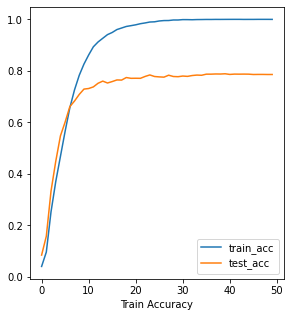

In [36]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Train Accuracy')
plt.plot(list(range(len(train_acc_list_50))), train_acc_list_50, label='train_acc')
plt.plot(list(range(len(test_acc_list_50))), test_acc_list_50, label='test_acc')

plt.legend()
plt.show()

In [32]:
# 실제 감성분석 해보기 
X_test

,intent_keyword,utterance(2차),ik_label
19464,불안/압박감,누가 신경줄을 갉아먹는 거 같아.,204
2467,슬픔/억울,아직 내가 하고 싶은 대로 살고 싶은데 너무 억울해,26
14443,죄책감/죄책감,애기 낳아도 잘 해줄 수 없을 거 같아서 너무 죄책감이 생겨,136
6137,무기력/활동감소,근데 가서 너무 힘들었거든… 너무 지치고 힘들었어.,57
1266,우울감/집중력감소,요즘 우울해서 그런지 철학책을 많이 읽게 됐어요.,12
...,...,...,...
836,우울감/집중력감소,멍하고 평소에도 자주 멍때려.,12
15784,집중력저하/곤란,공부에도 집중해야하는데…,159
17682,절망감/가치 없음,혼전임신이라고 사람들이 모욕감을 주니까 내가 너무 가치 없이 느껴져,189
13773,피로/졸림,점심만 먹으면 졸리고 피곤해,132


In [33]:
load_model = torch.load(data_path + 'BERT_keyword_model_50.pt')
load_model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
load_model.load_state_dict(torch.load(data_path + 'BERT_keyword_model_50.pt'))

<All keys matched successfully>

In [34]:
comments = X_test['utterance(2차) ']
comments

19464                       누가 신경줄을 갉아먹는 거 같아.
2467              아직 내가 하고 싶은 대로 살고 싶은데 너무 억울해
14443        애기 낳아도 잘 해줄 수 없을 거 같아서 너무 죄책감이 생겨
6137              근데 가서 너무 힘들었거든… 너무 지치고 힘들었어.
1266               요즘 우울해서 그런지 철학책을 많이 읽게 됐어요.
                         ...                  
836                           멍하고 평소에도 자주 멍때려.
15784                            공부에도 집중해야하는데…
17682    혼전임신이라고 사람들이 모욕감을 주니까 내가 너무 가치 없이 느껴져
13773                          점심만 먹으면 졸리고 피곤해
15505                         다음 날이면 후회가 가득해요.
Name: utterance(2차) , Length: 3936, dtype: object

In [35]:
y_true = X_test['ik_label']

In [36]:
import pandas as pd

# 위에서 설정한 tok, max_len, batch_size, device를 그대로 입력
# comment : 예측하고자 하는 텍스트 데이터 리스트
def getSentimentValue(comment, tok, max_len, batch_size, device):
    comments_list = [] # 텍스트 데이터를 담을 리스트
    main_list = [] # 대분류 카테고리 값을 담을 리스트
    
    for c in comment: # 모든 댓글
        comments_list.append( [c, 5] ) # [댓글, 임의의 양의 정수값] 설정
        
    pdData = pd.DataFrame(comments_list, columns = [['context', 'intent']] )
    pdData = pdData.values
    test_set = BERTDataset(pdData, 0, 1, tok, max_len, True, False) 
    test_input = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=5)
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_input):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length 
    
        # 이때, out이 예측 결과 리스트
        out = load_model(token_ids, valid_length, segment_ids)

        for pred in out: 
            main_list.append(np.argmax(pred.detach().cpu()))
        
    return main_list # 텍스트 데이터에 1대1 매칭되는 감성값 리스트 반환

In [37]:
y_pred = getSentimentValue(comments, tok, max_len, batch_size, device)   # tok, max_len, batch_size, device

In [38]:
y_true

19464    204
2467      26
14443    136
6137      57
1266      12
        ... 
836       12
15784    159
17682    189
13773    132
15505    149
Name: ik_label, Length: 3936, dtype: int64

In [39]:
len(y_true), len(y_pred)

(3936, 3936)

In [40]:
y_pred = list(map(int, y_pred)) 
# y_pred

In [41]:
y_pred[0]

122

In [51]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score, classification_report

confusion_mt = pd.DataFrame(confusion_matrix(y_true, y_pred))
confusion_mt 

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,19,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,16,0


In [52]:
confusion_mt.columns = ik_list 
confusion_mt.index = ik_list

In [53]:
confusion_mt

,우울감/우울,우울감/침울,우울감/멍함,우울감/무기력,우울감/의욕감소,우울감/불면,우울감/흥미상실,우울감/식욕부진,우울감/자존감감소,우울감/패배감,...,절망감/나약,절망감/절박,절망감/하찮음,자살충동/하찮음,불안/불안,불안/긴장,불안/낭떠러지 끝에 있는 느낌,불안/두렵다,불안/울렁거리다,불안/압박감
우울감/우울,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
우울감/침울,0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
우울감/멍함,0,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
우울감/무기력,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
우울감/의욕감소,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
불안/긴장,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,19,0,0,0,0
불안/낭떠러지 끝에 있는 느낌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
불안/두렵다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,0,0
불안/울렁거리다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,16,0


In [54]:
f1 = round(f1_score(y_true, y_pred, average='micro'), 3) 
f1

0.787

In [46]:
print('hi')

hi


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [50]:
multiclass_roc_auc_score(y_true, y_pred)

0.8762729244066882

In [45]:
multiclass_roc_auc_score(y_true, y_pred)

0.875715101145124

In [56]:
ik_idx = list(range(len(ik_list)))
ik_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
cr = classification_report(y_true, y_pred).split('\n')
cr

/home/ubuntu/anaconda3/envs/chatbot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/chatbot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/chatbot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

['              precision    recall  f1-score   support',
 '',
 '           0       0.74      0.94      0.83        18',
 '           1       0.79      0.85      0.81        13',
 '           2       0.72      0.93      0.81        14',
 '           3       0.26      0.42      0.32        12',
 '           4       0.71      0.83      0.77        12',
 '           5       0.64      0.58      0.61        12',
 '           6       0.69      0.69      0.69        13',
 '           7       0.69      0.75      0.72        12',
 '           8       1.00      0.75      0.86        12',
 '           9       0.89      0.67      0.76        12',
 '          10       0.17      0.08      0.11        12',
 '          11       0.30      0.25      0.27        12',
 '          12       0.91      0.85      0.88       179',
 '          13       0.56      0.77      0.65        13',
 '          14       0.80      0.67      0.73        12',
 '          15       0.77      0.83      0.80        12',
 '       

In [58]:
clr_df = []

for idx, line in enumerate(cr):
    clr_df.append([])
    if line == '':
        continue
    
    word_list = line.strip().split(' ')
    
    for word in word_list:
        if word != '':
            clr_df[idx].append(word)

clr_df

[['precision', 'recall', 'f1-score', 'support'],
 [],
 ['0', '0.74', '0.94', '0.83', '18'],
 ['1', '0.79', '0.85', '0.81', '13'],
 ['2', '0.72', '0.93', '0.81', '14'],
 ['3', '0.26', '0.42', '0.32', '12'],
 ['4', '0.71', '0.83', '0.77', '12'],
 ['5', '0.64', '0.58', '0.61', '12'],
 ['6', '0.69', '0.69', '0.69', '13'],
 ['7', '0.69', '0.75', '0.72', '12'],
 ['8', '1.00', '0.75', '0.86', '12'],
 ['9', '0.89', '0.67', '0.76', '12'],
 ['10', '0.17', '0.08', '0.11', '12'],
 ['11', '0.30', '0.25', '0.27', '12'],
 ['12', '0.91', '0.85', '0.88', '179'],
 ['13', '0.56', '0.77', '0.65', '13'],
 ['14', '0.80', '0.67', '0.73', '12'],
 ['15', '0.77', '0.83', '0.80', '12'],
 ['16', '0.82', '0.75', '0.78', '12'],
 ['17', '0.86', '0.50', '0.63', '12'],
 ['18', '0.90', '0.75', '0.82', '12'],
 ['19', '0.65', '0.92', '0.76', '12'],
 ['20', '1.00', '1.00', '1.00', '13'],
 ['21', '1.00', '0.92', '0.96', '13'],
 ['22', '0.89', '0.67', '0.76', '12'],
 ['23', '0.77', '0.77', '0.77', '13'],
 ['24', '0.89', '0.

In [59]:
clr_df[-2][0] = ' '.join([clr_df[-2][0], clr_df[-2][1]])
clr_df[-3][0] = ' '.join([clr_df[-3][0], clr_df[-3][1]])
clr_df[-4].insert(1, ' ')
clr_df[-4].insert(2, ' ')
clr_df[0].insert(0, 'index')

In [60]:
clr_df[-2].pop(1)
clr_df[-3].pop(1)
clr_df.pop(1)
clr_df.pop(-1)
clr_df.pop(-4)
clr_df

[['index', 'precision', 'recall', 'f1-score', 'support'],
 ['0', '0.74', '0.94', '0.83', '18'],
 ['1', '0.79', '0.85', '0.81', '13'],
 ['2', '0.72', '0.93', '0.81', '14'],
 ['3', '0.26', '0.42', '0.32', '12'],
 ['4', '0.71', '0.83', '0.77', '12'],
 ['5', '0.64', '0.58', '0.61', '12'],
 ['6', '0.69', '0.69', '0.69', '13'],
 ['7', '0.69', '0.75', '0.72', '12'],
 ['8', '1.00', '0.75', '0.86', '12'],
 ['9', '0.89', '0.67', '0.76', '12'],
 ['10', '0.17', '0.08', '0.11', '12'],
 ['11', '0.30', '0.25', '0.27', '12'],
 ['12', '0.91', '0.85', '0.88', '179'],
 ['13', '0.56', '0.77', '0.65', '13'],
 ['14', '0.80', '0.67', '0.73', '12'],
 ['15', '0.77', '0.83', '0.80', '12'],
 ['16', '0.82', '0.75', '0.78', '12'],
 ['17', '0.86', '0.50', '0.63', '12'],
 ['18', '0.90', '0.75', '0.82', '12'],
 ['19', '0.65', '0.92', '0.76', '12'],
 ['20', '1.00', '1.00', '1.00', '13'],
 ['21', '1.00', '0.92', '0.96', '13'],
 ['22', '0.89', '0.67', '0.76', '12'],
 ['23', '0.77', '0.77', '0.77', '13'],
 ['24', '0.89',

In [61]:
clr_df = pd.DataFrame(clr_df[1:], columns=clr_df[0])
clr_df

,index,precision,recall,f1-score,support
0,0,0.74,0.94,0.83,18
1,1,0.79,0.85,0.81,13
2,2,0.72,0.93,0.81,14
3,3,0.26,0.42,0.32,12
4,4,0.71,0.83,0.77,12
...,...,...,...,...,...
203,203,1.00,0.94,0.97,17
204,204,0.82,0.69,0.75,96
205,accuracy,,,0.79,3936
206,macro avg,0.76,0.75,0.75,3936


In [62]:
clr_df.index = clr_df['index']

del clr_df['index']
clr_df

,precision,recall,f1-score,support
index,,,,
0,0.74,0.94,0.83,18
1,0.79,0.85,0.81,13
2,0.72,0.93,0.81,14
3,0.26,0.42,0.32,12
4,0.71,0.83,0.77,12
...,...,...,...,...
203,1.00,0.94,0.97,17
204,0.82,0.69,0.75,96
accuracy,,,0.79,3936


In [75]:
sorted_clr_df = clr_df.sort_values(by='f1-score',ascending=False)
top = sorted_clr_df[:10]
low = sorted_clr_df[-10:]

In [76]:
top

,precision,recall,f1-score,support
index,,,,
162,1.00,1.00,1.00,2
70,1.00,1.00,1.00,4
66,1.00,1.00,1.00,4
65,1.00,1.00,1.00,4
72,1.00,1.00,1.00,4
64,1.00,1.00,1.00,4
74,1.00,1.00,1.00,4
173,1.00,1.00,1.00,13
172,1.00,1.00,1.00,12


In [77]:
low

,precision,recall,f1-score,support
index,,,,
46,0.33,0.17,0.22,12
62,0.17,0.25,0.20,4
51,0.13,0.17,0.15,12
10,0.17,0.08,0.11,12
61,0.00,0.00,0.00,4
56,0.00,0.00,0.00,4
54,0.00,0.00,0.00,4
53,0.00,0.00,0.00,4
159,0.00,0.00,0.00,4


In [71]:
from sklearn.preprocessing import label_binarize 

y_true = label_binarize(y_true, classes=ik_idx)
y_pred = label_binarize(y_pred, classes=ik_idx)

In [72]:
len(ik_idx)

205

In [73]:
from sklearn.metrics import roc_curve, auc

n_classes = 205
fpr = dict()
tpr = dict()
roc_auc = dict() 

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

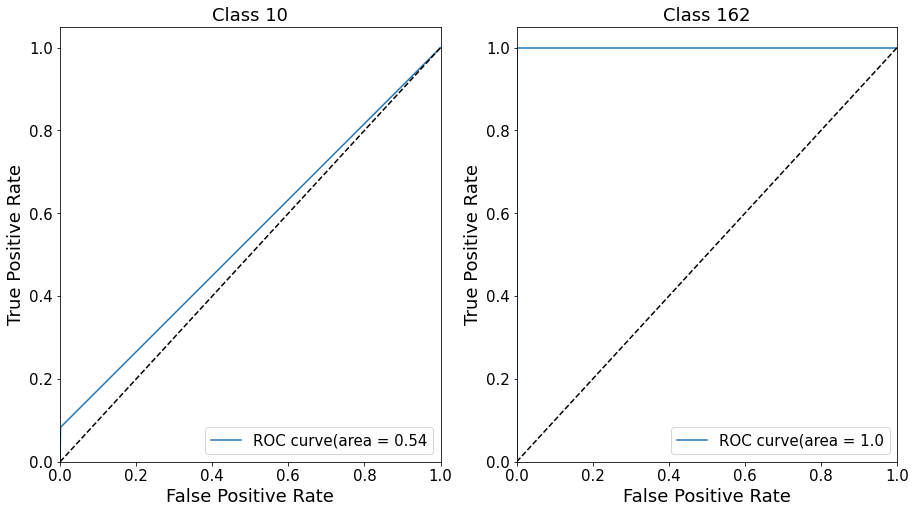

In [79]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 8))
val = 0

# font = {'size': 15}
# plt.rc('font', **font)
plt.rcParams.update({'font.size': 15, 'font.weight': 'normal'})

for idx, i in enumerate(range(n_classes)):
    if idx == 162 or idx == 10: 
        plt.subplot(121+val) 
        plt.plot(fpr[i], tpr[i], label = f'ROC curve(area = {round(roc_auc[i], 2)}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18) 
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.title(f'Class {idx}', fontsize=18)
        plt.legend(loc='lower right')
        val += 1
plt.show()

In [81]:
ik_list[162]

'자신감저하/느긋'